<a href="https://colab.research.google.com/github/davidriveraarbelaez/IA_Explorador/blob/main/Tema3_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# 1. Generar datos sintéticos
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Valores entre 0 y 10
y = np.sin(X).ravel() + np.random.normal(scale=0.5, size=X.shape[0])  # Seno con ruido


In [2]:
# 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 3. Función para simular underfitting
def simulate_underfitting(X_train, y_train, X_test, y_test, degrees):
    plt.figure(figsize=(12, 8))

    for degree in degrees:
        # Transformar datos a características polinomiales
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        # Ajustar un modelo de regresión lineal
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predicciones
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        # Calcular errores
        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Graficar resultados
        X_plot = np.linspace(0, 10, 500).reshape(-1, 1)
        X_plot_poly = poly_features.transform(X_plot)
        y_plot = model.predict(X_plot_poly)

        plt.plot(X_plot, y_plot, label=f'Degree {degree} (Train Error={train_error:.2f}, Test Error={test_error:.2f})')

    # Graficar los datos originales
    plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.6)
    plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.6)

    # Detalles del gráfico
    plt.title('Simulación de Underfitting con Modelos Polinomiales', fontsize=16)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

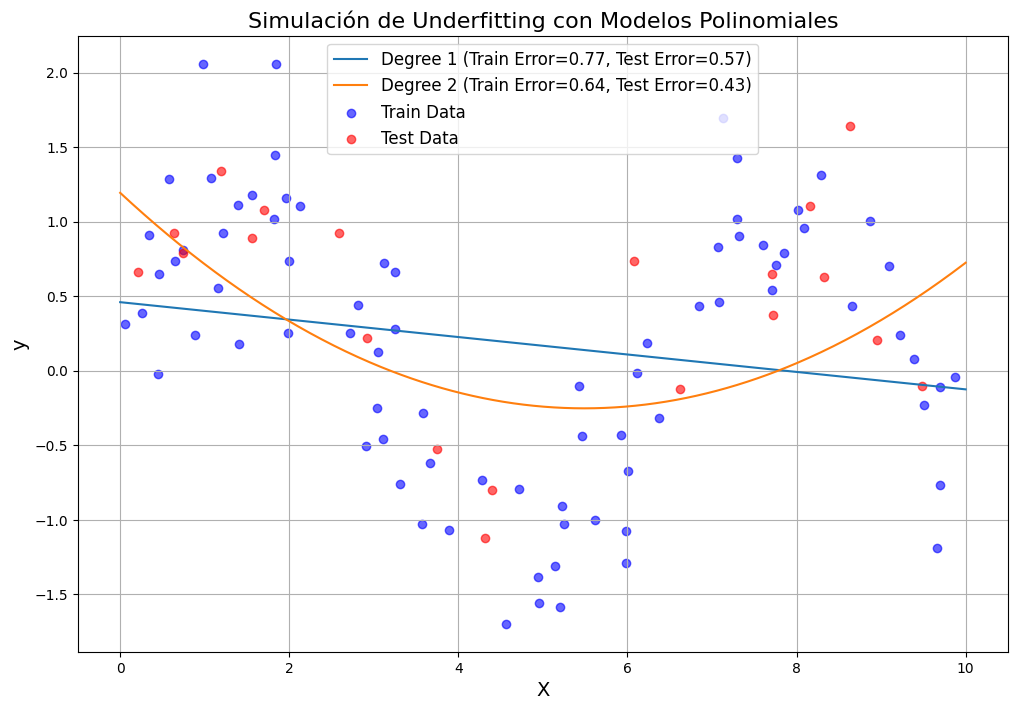

In [ ]:
# 4. Simular con grados polinomiales bajos
simulate_underfitting(X_train, y_train, X_test, y_test, degrees=[1, 2])